In [4]:
# import data augmenter 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import imgaug.augmenters as imgaug

In [2]:
img = cv2.imread('../data/devasheesh_0.jpg')

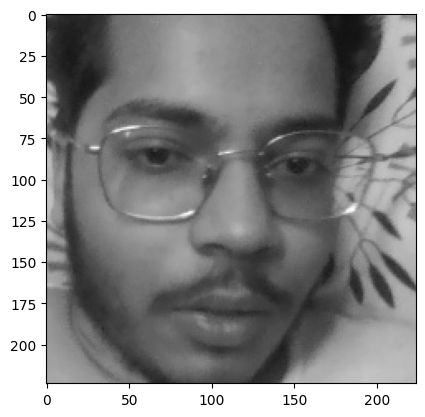

In [3]:
plt.imshow(img, cmap='gray')

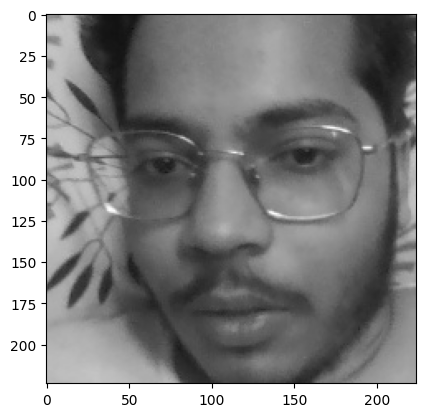

In [11]:
plt.imshow(tf.image.random_flip_left_right(img), cmap='gray')

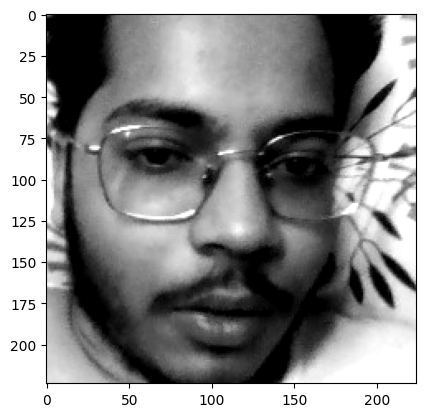

In [15]:
plt.imshow(tf.image.random_contrast(img, 1.5, 2.5), cmap='gray')

## Tensorflow Image Dataset Generator

In [35]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

In [ ]:
for i in range(5):
    plt.imshow(datagen.random_transform(img), cmap='gray')
    plt.show()


## Using imgaug library

In [258]:
augmenter = imgaug.Sequential([
    imgaug.Rotate((-45, 45)),  #rotate
    imgaug.Fliplr(0.5), #flip left right
    imgaug.Flipud(0.5), #flip up down
    imgaug.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),  #move image in x and y axis
    imgaug.Affine(scale=(0.8, 1.2)),    #scale image
    imgaug.Multiply((0.8, 1.2)),    #multiply image
    
    imgaug.Sometimes(0.5, 
                     imgaug.GaussianBlur(sigma=(0.0, 3.0)), #blur image
                     imgaug.AdditiveGaussianNoise(scale=(0, 0.05*255)), #add noise
                     ),
    
    imgaug.LinearContrast((0.5, 1.5)),  #change contrast
    
])

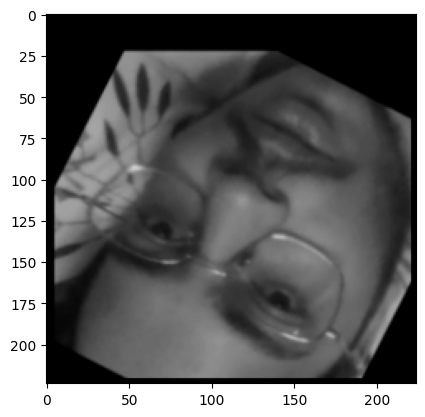

In [309]:
augmented_image = augmenter.augment_image(img)
plt.imshow(augmented_image, cmap='gray')